## U-> analytical output
## u_pred-> pinn output

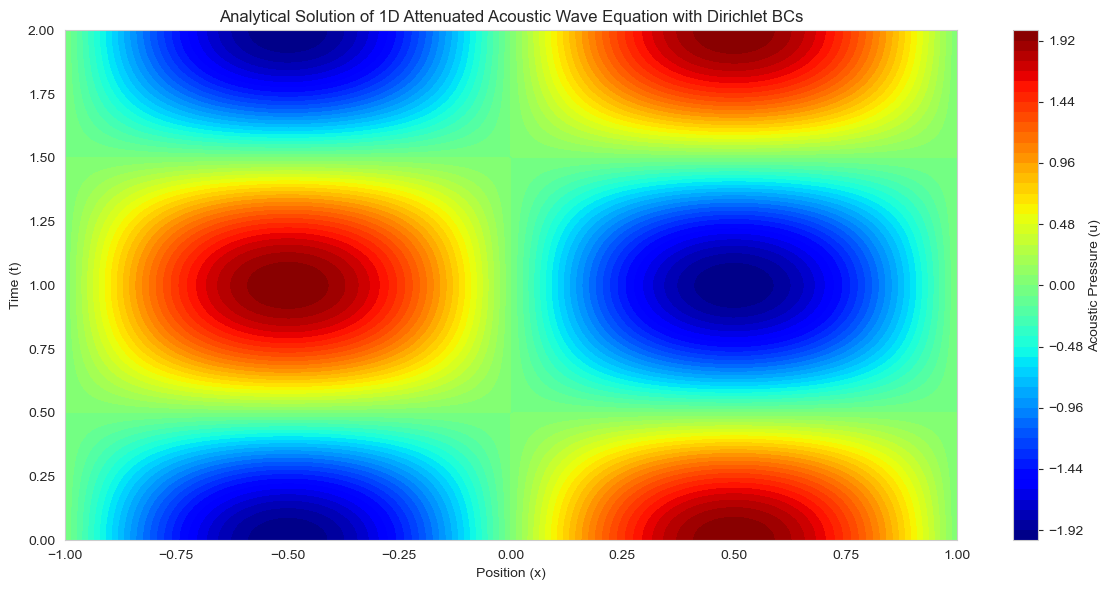

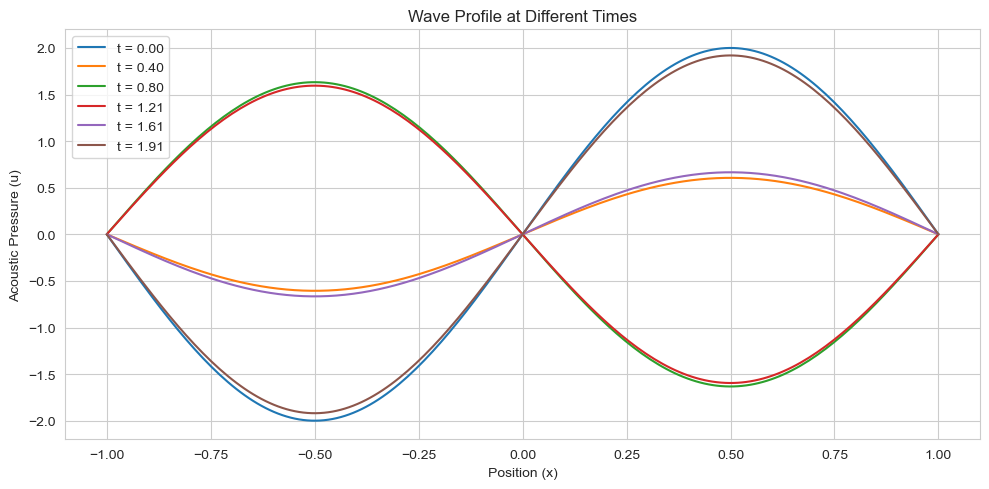

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation  # For creating animations
from IPython.display import HTML  # For displaying animations in Jupyter
import imageio  # For GIF creation (used internally by matplotlib)


# Parameters
L = 1.0           # Length of the domain (x ∈ [-L, L])
c = 1.0           # Speed of sound
alpha = 0       # Attenuation coefficient
T_max = 2.0       # Maximum time
N_points = 200    # Number of spatial points
N_times = 200     # Number of time points
N = 50            # Number of Fourier modes

# Discretization
x = np.linspace(-L, L, N_points)
t = np.linspace(0, T_max, N_times)
X, T = np.meshgrid(x, t)

# Initial condition: u(x, 0) = sin(pi * x), du/dt(x, 0) = 0
def f(x):
    return np.sin(np.pi * x)

def g(x):
    return np.zeros_like(x)

# Fourier coefficients for initial conditions
def A_n(n):
    return 2 * np.trapz(f(x) * np.sin(n * np.pi * x / L), x) / L

def B_n(n):
    return 0  # Because g(x) = 0 (du/dt = 0 everywhere)

# Angular frequency including attenuation
def omega_n(n):
    wn_sq = (c * n * np.pi / L)**2 - (alpha / 2)**2
    return np.sqrt(wn_sq) if wn_sq > 0 else 0

# Analytical solution using Fourier series
U = np.zeros_like(X)
for n in range(1, N + 1):
    A = A_n(n)
    w_n = omega_n(n)
    if w_n > 0:
        mode = A * np.exp(-alpha * T / 2) * np.cos(w_n * T) * np.sin(n * np.pi * X / L)
        U += mode

#
#
#
#
#
#
#
#


# -------- Contour Plot --------
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.contourf(X, T, U, levels=50, cmap="jet")
plt.colorbar(label="Acoustic Pressure (u)")
plt.xlabel("Position (x)")
plt.ylabel("Time (t)")
plt.title("Analytical Solution of 1D Attenuated Acoustic Wave Equation with Dirichlet BCs")
plt.tight_layout()
plt.show()

# -------- Line Plot for Specific Time Steps --------
plt.figure(figsize=(10, 5))
time_indices = [0, 40, 80, 120, 160, 190]  # Select some time steps
for idx in time_indices:
    plt.plot(x, U[idx, :], label=f"t = {t[idx]:.2f}")

plt.xlabel("Position (x)")
plt.ylabel("Acoustic Pressure (u)")
plt.title("Wave Profile at Different Times")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Animation

# Create animation
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot(x, U[0, :], 'b-', linewidth=2)
ax.set_xlim(-1, 1)
ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel("Position (x)")
ax.set_ylabel("Acoustic Pressure (u)")
ax.set_title("Wave Propagation with Attenuation (α = 2)")
ax.grid(True)

def update(frame):
    line.set_ydata(U[frame, :])
    ax.set_title(f"Wave Propagation with Attenuation (α = 0) - Time = {t[frame]:.2f}")
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)

# Save as GIF
ani.save('wave_propagation.gif', writer='pillow', fps=20)

plt.close()

# Display the GIF in the notebook (if running in Jupyter)
HTML('<img src="wave_propagation.gif">')

In [4]:
%whos


Variable        Type             Data/Info
------------------------------------------
A               float64          2.881809374466471e-16
A_n             function         <function A_n at 0x000001D7776F19E0>
B_n             function         <function B_n at 0x000001D7789A6DE0>
FuncAnimation   type             <class 'matplotlib.animation.FuncAnimation'>
HTML            type             <class 'IPython.core.display.HTML'>
L               float            1.0
N               int              50
N_points        int              200
N_times         int              200
T               ndarray          200x200: 40000 elems, type `float64`, 320000 bytes (312.5 kb)
T_max           float            2.0
U               ndarray          200x200: 40000 elems, type `float64`, 320000 bytes (312.5 kb)
X               ndarray          200x200: 40000 elems, type `float64`, 320000 bytes (312.5 kb)
alpha           int              2
ani             FuncAnimation    <matplotlib.animation.Fun<...>ct at

Compiling model...
'compile' took 0.000319 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [7.34e-03, 6.63e-02, 6.09e-01, 5.19e-02]    [7.34e-03, 6.63e-02, 6.09e-01, 5.19e-02]    []  
1000      [1.19e-02, 7.45e-02, 1.52e-01, 1.42e-03]    [1.19e-02, 7.45e-02, 1.52e-01, 1.42e-03]    []  
2000      [5.10e-03, 5.02e-02, 3.25e-02, 3.46e-04]    [5.10e-03, 5.02e-02, 3.25e-02, 3.46e-04]    []  
3000      [2.37e-03, 3.97e-02, 9.19e-03, 5.94e-04]    [2.37e-03, 3.97e-02, 9.19e-03, 5.94e-04]    []  
4000      [2.49e-03, 2.36e-02, 2.65e-03, 3.40e-04]    [2.49e-03, 2.36e-02, 2.65e-03, 3.40e-04]    []  
5000      [1.20e-03, 7.14e-03, 1.09e-03, 1.29e-04]    [1.20e-03, 7.14e-03, 1.09e-03, 1.29e-04]    []  
6000      [3.34e-04, 1.20e-03, 1.50e-04, 7.27e-05]    [3.34e-04, 1.20e-03, 1.50e-04, 7.27e-05]    []  
7000      [1.56e-04, 2.92e-04, 7.68e-05, 6.83e-05]    [1.56e-04, 2.92e-04, 7.68e-05, 6.83e-05]    []  
8

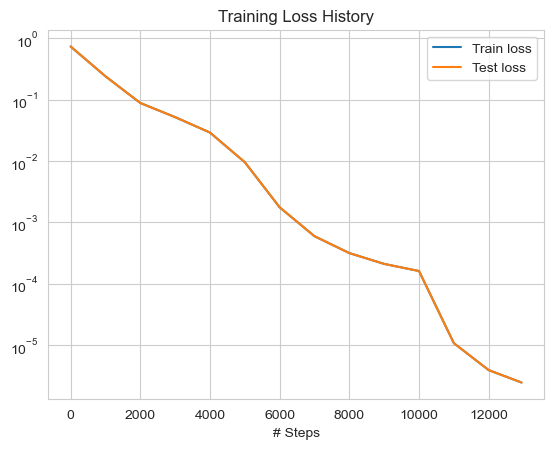

In [9]:
# Import necessary libraries
import deepxde as dde  # Main DeepXDE library for physics-informed neural networks
import numpy as np     # Numerical computing
import matplotlib.pyplot as plt  # Plotting
from matplotlib.animation import FuncAnimation  # For creating animations
from IPython.display import HTML  # For displaying animations in Jupyter
import imageio  # For GIF creation (used internally by matplotlib)

# Set random seed for reproducibility - ensures consistent results across runs
dde.config.set_random_seed(42)


# ========== DOMAIN DEFINITION ==========
geom = dde.geometry.Interval(-L, L)  # Spatial domain (1D line from -L to L)
timedomain = dde.geometry.TimeDomain(0, T_max)  # Temporal domain
geomtime = dde.geometry.GeometryXTime(geom, timedomain)  # Combined space-time


# ========== PDE DEFINITION ==========
def wave_pde(x, u):
    # Calculate derivatives using automatic differentiation:
    du_tt = dde.grad.hessian(u, x, i=1, j=1)  # ∂²u/∂t²; 2nd time derivative (acceleration)
    du_t = dde.grad.jacobian(u, x, i=0, j=1)   # ∂u/∂t; 1st time derivative (damping term)
    du_xx = dde.grad.hessian(u, x, i=0, j=0)   # ∂²u/∂x²; 2nd space derivative (wave term)

    # The actual PDE: ∂²u/∂t² + α ∂u/∂t = c² ∂²u/∂x²
    return du_tt + alpha * du_t - c**2 * du_xx



# ========== INITIAL AND BOUNDARY CONDITIONS ==========
def initial_condition(x):
    # Initial shape of the wave: u(x,0) = sin(πx)
    return np.sin(np.pi * x[:, 0:1])   # assuming domain x in [0, 1]

def initial_velocity(x):
    return np.zeros_like(x[:, 0:1])
    
def boundary_left_right(x, on_boundary):
    # Boundary condition: u(-L,t) = u(L,t) = 0
    return on_boundary and (np.isclose(x[0], -L) or np.isclose(x[0], L))

# Dirichlet boundary condition (u=0 at boundaries)
bc = dde.DirichletBC(geomtime, lambda x: 0, boundary_left_right)

# Initial condition for displacement
ic_u = dde.IC(geomtime, initial_condition, lambda _, on_initial: on_initial)

# Initial condition for velocity (∂u/∂t=0 at t=0)
ic_ut = dde.OperatorBC(
    geomtime,
    lambda x, u, _: dde.grad.jacobian(u, x, i=0, j=1), # ∂u/∂t
    lambda x, _: np.isclose(x[1], 0), # At t=0
)
#========================================================

# ========== PROBLEM SETUP ==========
# Compile the PDE problem
data = dde.data.TimePDE(
    geomtime,
    wave_pde,
    [bc, ic_u, ic_ut],  # All conditions together
    
    num_domain=1000,    # Number of collocation points in domain
    num_boundary=100,   # Number of boundary points
    num_initial=100,    # Number of initial condition points
)

# ========== NEURAL NETWORK ARCHITECTURE ==========
layer_size = [2] + [50] * 3 + [1]  # 2 inputs (x,t), 3 hidden layers with 50 neurons, 1 output
activation = "tanh"    # Good for PDE solutions
initializer = "Glorot uniform"  # Weight initialization

# Create the neural network
net = dde.maps.FNN(layer_size, activation, initializer)

# ========== MODEL TRAINING ==========
model = dde.Model(data, net)

# Phase 1: Adam optimizer for 10,000 iterations
model.compile("adam", lr=1e-4)
losshistory, train_state = model.train(iterations=10000)

# Phase 2: Fine-tune with L-BFGS
model.compile("L-BFGS")
losshistory, train_state = model.train(iterations=20000)

# Plot loss history (Shows how the error decreases over training.)
dde.utils.plot_loss_history(losshistory)
plt.title("Training Loss History")
plt.show()




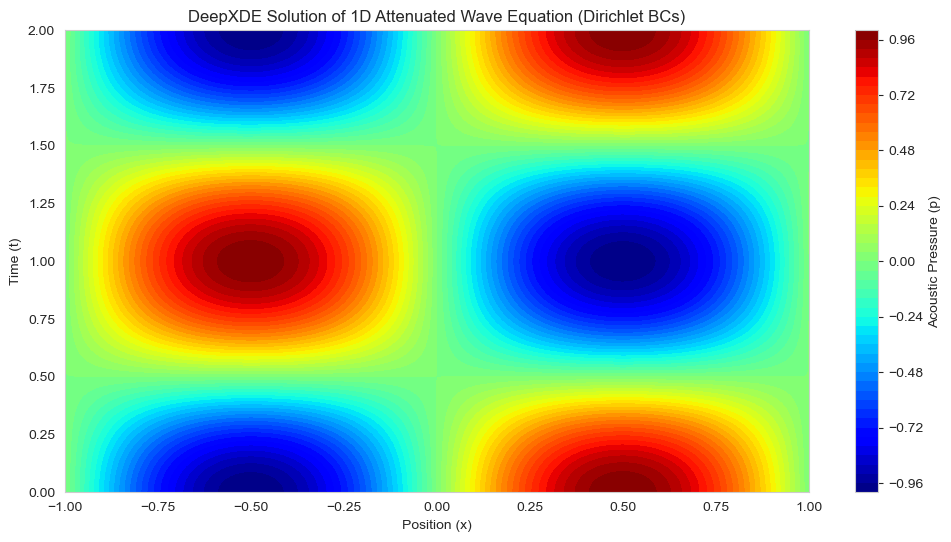

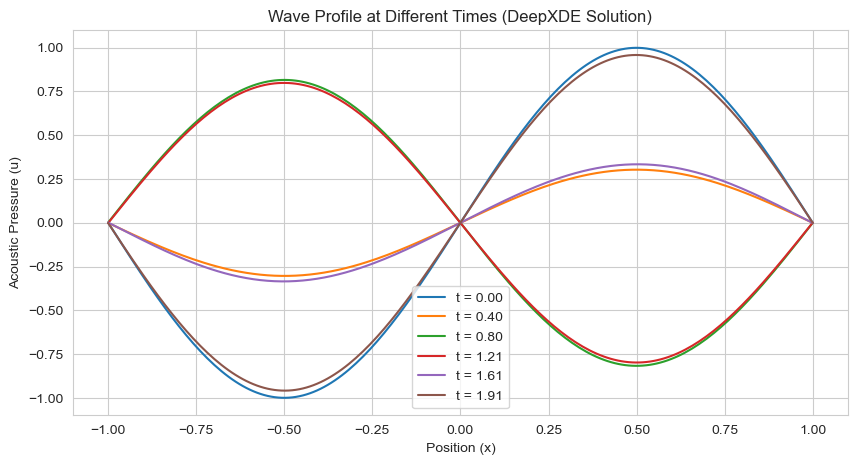

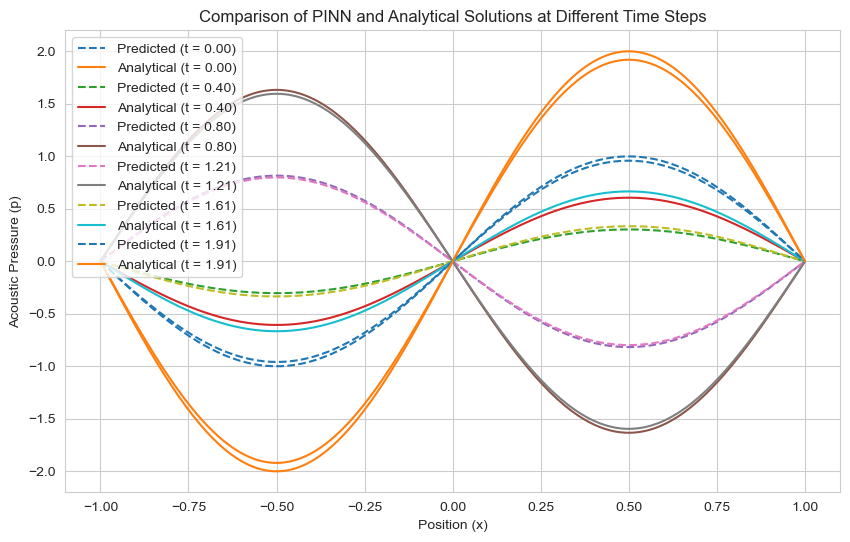

In [10]:

# SOLUTION VISUALIZATION

x = np.linspace(-L, L, N_points)
t = np.linspace(0, T_max, N_times)
X, T = np.meshgrid(x, t)
# Predict solution at all grid points
points = np.vstack((X.flatten(), T.flatten())).T # np.hstack((X.flatten()[:, None], T.flatten()[:, None]))
u_pred = model.predict(points).reshape(N_times, N_points)

# ========== Contour Plot of solution ==========
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.contourf(X, T, u_pred, levels=50, cmap="jet")
plt.colorbar(label="Acoustic Pressure (p)")
plt.xlabel("Position (x)")
plt.ylabel("Time (t)")
plt.title("DeepXDE Solution of 1D Attenuated Wave Equation (Dirichlet BCs)")
plt.show()
# ========== Contour Plot of solution ========== 


#  ==========Line Plot for of solution Specific Time Steps ==========
plt.figure(figsize=(10, 5))
time_indices = [0, 40, 80, 120, 160, 190] 
for idx in time_indices:
    plt.plot(x, u_pred[idx, :], label=f"t = {t[idx]:.2f}")

plt.xlabel("Position (x)")
plt.ylabel("Acoustic Pressure (u)")
plt.title("Wave Profile at Different Times (DeepXDE Solution)")
plt.legend()
plt.grid(True)
plt.show()
#  ========== Line Plot for of solution Specific Time Steps  ==========




# ========== ANIMATION CREATION ==========
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot(x, u_pred[0, :], 'b-', linewidth=2)
ax.set_xlim(-L, L)
ax.set_ylim(np.min(u_pred), np.max(u_pred))
ax.set_xlabel("Position (x)")
ax.set_ylabel("Acoustic Pressure (u)")
ax.set_title("Wave Propagation with Attenuation (DeepXDE Solution)")
ax.grid(True)

def update(frame):
    """Update function for animation - called for each frame"""
    line.set_ydata(u_pred[frame, :]) # Update wave profile
    ax.set_title(f"Wave Propagation (DeepXDE) - Time = {t[frame]:.2f}")
    return line,

# Create the animation object
ani = FuncAnimation(
    fig, 
    update, 
    frames=len(t),  # Number of frames (one per time step)
    interval=50,    # Delay between frames in ms
    blit=True       # Efficient rendering
)

# Save as GIF
ani.save('wave_propagation_deepxde.gif', 
         writer='pillow',  # Uses PIL library
         fps=20)           # Frames per second
plt.close()
# Display in notebook (if using Jupyter)
HTML('<img src="wave_propagation_deepxde.gif">')
# ========== ANIMATION CREATION ========== #




# =============== Comparison Plots at Specific Times ==================#
plt.figure(figsize=(10, 6))
for t_idx in [0, 40, 80, 120, 160, 190]:
    plt.plot(x, u_pred[t_idx, :], label=f"Predicted (t = {t[t_idx]:.2f})", linestyle="--")
    plt.plot(x, U[t_idx, :], label=f"Analytical (t = {t[t_idx]:.2f})", linestyle="-")
plt.xlabel("Position (x)")
plt.ylabel("Acoustic Pressure (p)")
plt.title("Comparison of PINN and Analytical Solutions at Different Time Steps")
plt.legend()
plt.grid(True)
plt.show()
# =============== Comparison Plots at Specific Times ==================#





U at x=-L: 2.448988390638036e-16
U at x=+L: 2.4492935982948e-16


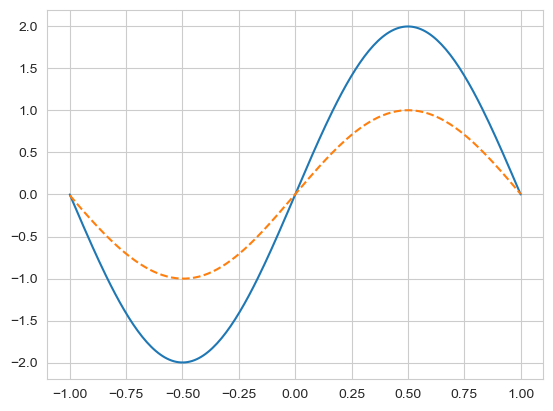

In [5]:
print("U at x=-L:", U[:, 0].max())  # Should be ≈ 0
print("U at x=+L:", U[:, -1].max())  # Should be ≈ 0
plt.plot(x, U[1,:], label='Analytical')
plt.plot(x, u_pred[1,:], '--', label='PINN')